# Connect to Google drive and unzip the datasets

In [ ]:
# Comment this chunk if you're using google colab
from google.colab import drive
drive.mount('/content/drive')

!cp -r '/content/drive/My Drive/Olotu/datasets' 'datasets'

!pip install geopandas --quiet


# Uncomment this chunk if youre not using google colab
"""
# Install map dependency
from subprocess import run
run(["pip", "install", "geopandas"])
"""

# Import necessary libraries and read the CSV files
First, import the required libraries and read the CSV files using pandas:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Read CSV files
cause_of_death_communicable_df = pd.read_csv('datasets/API_SH.DTH.COMM.ZS_DS2_en_csv_v2_5363876/API_SH.DTH.COMM.ZS_DS2_en_csv_v2_5363876.csv', skiprows=4) # Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)
health_expenditure_df = pd.read_csv('datasets/API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_5358500/API_SH.XPD.CHEX.GD.ZS_DS2_en_csv_v2_5358500.csv', skiprows=4).iloc[:, :-1] # Current health expenditure (% of GDP)
death_rate_df = pd.read_csv('datasets/API_SP.DYN.CDRT.IN_DS2_en_csv_v2_5359308/API_SP.DYN.CDRT.IN_DS2_en_csv_v2_5359308.csv', skiprows=4) # Death rate, crude (per 1,000 people)
cause_of_death_noncommunicable_df = pd.read_csv('datasets/API_SH.DTH.NCOM.ZS_DS2_en_csv_v2_5360025/API_SH.DTH.NCOM.ZS_DS2_en_csv_v2_5360025.csv', skiprows=4) #Cause of death, by non-communicable diseases (% of total)
hospital_beds_df = pd.read_csv('datasets/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_5363904/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_5363904.csv', skiprows=4) # Hospital beds (per 1,000 people)
nurses_midwives_df = pd.read_csv('datasets/API_SH.MED.NUMW.P3_DS2_en_csv_v2_5359576/API_SH.MED.NUMW.P3_DS2_en_csv_v2_5359576.csv', skiprows=4) # Nurses and midwives (per 1,000 people)
physicians_df = pd.read_csv('datasets/API_SH.MED.PHYS.ZS_DS2_en_csv_v2_5359574/API_SH.MED.PHYS.ZS_DS2_en_csv_v2_5359574.csv', skiprows=4) # Physicians (per 1,000 people)
specialist_surgical_workforce_df = pd.read_csv('datasets/API_SH.MED.SAOP.P5_DS2_en_csv_v2_5359559/API_SH.MED.SAOP.P5_DS2_en_csv_v2_5359559.csv', skiprows=4) # Specialist surgical workforce (per 100,000 population)
Country_metadata_df = pd.read_csv('datasets/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352.csv').iloc[:, :-1] # Country metadata



# Preprocess the data
Clean the data

In [3]:
years_to_keep = list(str(i) for i in range(2000, 2020))
years_to_keep2 = list(str(i) for i in range(2000, 2021))
cols_to_keep = ['Country Name', 'Country Code'] + years_to_keep
cols_to_keep2 = ['Country Name', 'Country Code'] + years_to_keep2

# Select the required columns
cause_of_death_noncommunicable_df = cause_of_death_noncommunicable_df.loc[:, cols_to_keep]
health_expenditure_df = health_expenditure_df.loc[:, cols_to_keep]
death_rate_df = death_rate_df.loc[:, cols_to_keep]
cause_of_death_communicable_df = cause_of_death_communicable_df.loc[:, cols_to_keep]
hospital_beds_df = hospital_beds_df.loc[:, cols_to_keep]
nurses_midwives_df = nurses_midwives_df.loc[:, cols_to_keep2]
physicians_df = physicians_df.loc[:, cols_to_keep]
specialist_surgical_workforce_df = specialist_surgical_workforce_df.loc[:, cols_to_keep]


# List of selected countries
high_income = Country_metadata_df.loc[Country_metadata_df["IncomeGroup"] == "High income", "Country Code"].tolist()
low_income = Country_metadata_df.loc[Country_metadata_df["IncomeGroup"] == "Low income", "Country Code"].tolist()

#Countries selected for the pie grids, 3 High income countries, 3 low income countries
selected_countries = ["AUS", "GBR", "USA"] + ["AFG", "RWA", "NER"]

#Create subplots using GridSpec
Now, create a grid layout using GridSpec and plot the required data:

<ipython-input-5-2333fd9ffada>:59: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:489: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.draw()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:489: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.draw()
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:489: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.draw()
<ipython-input-5-2333fd9ffada>:186: FutureWarning: The default value of numeric_o

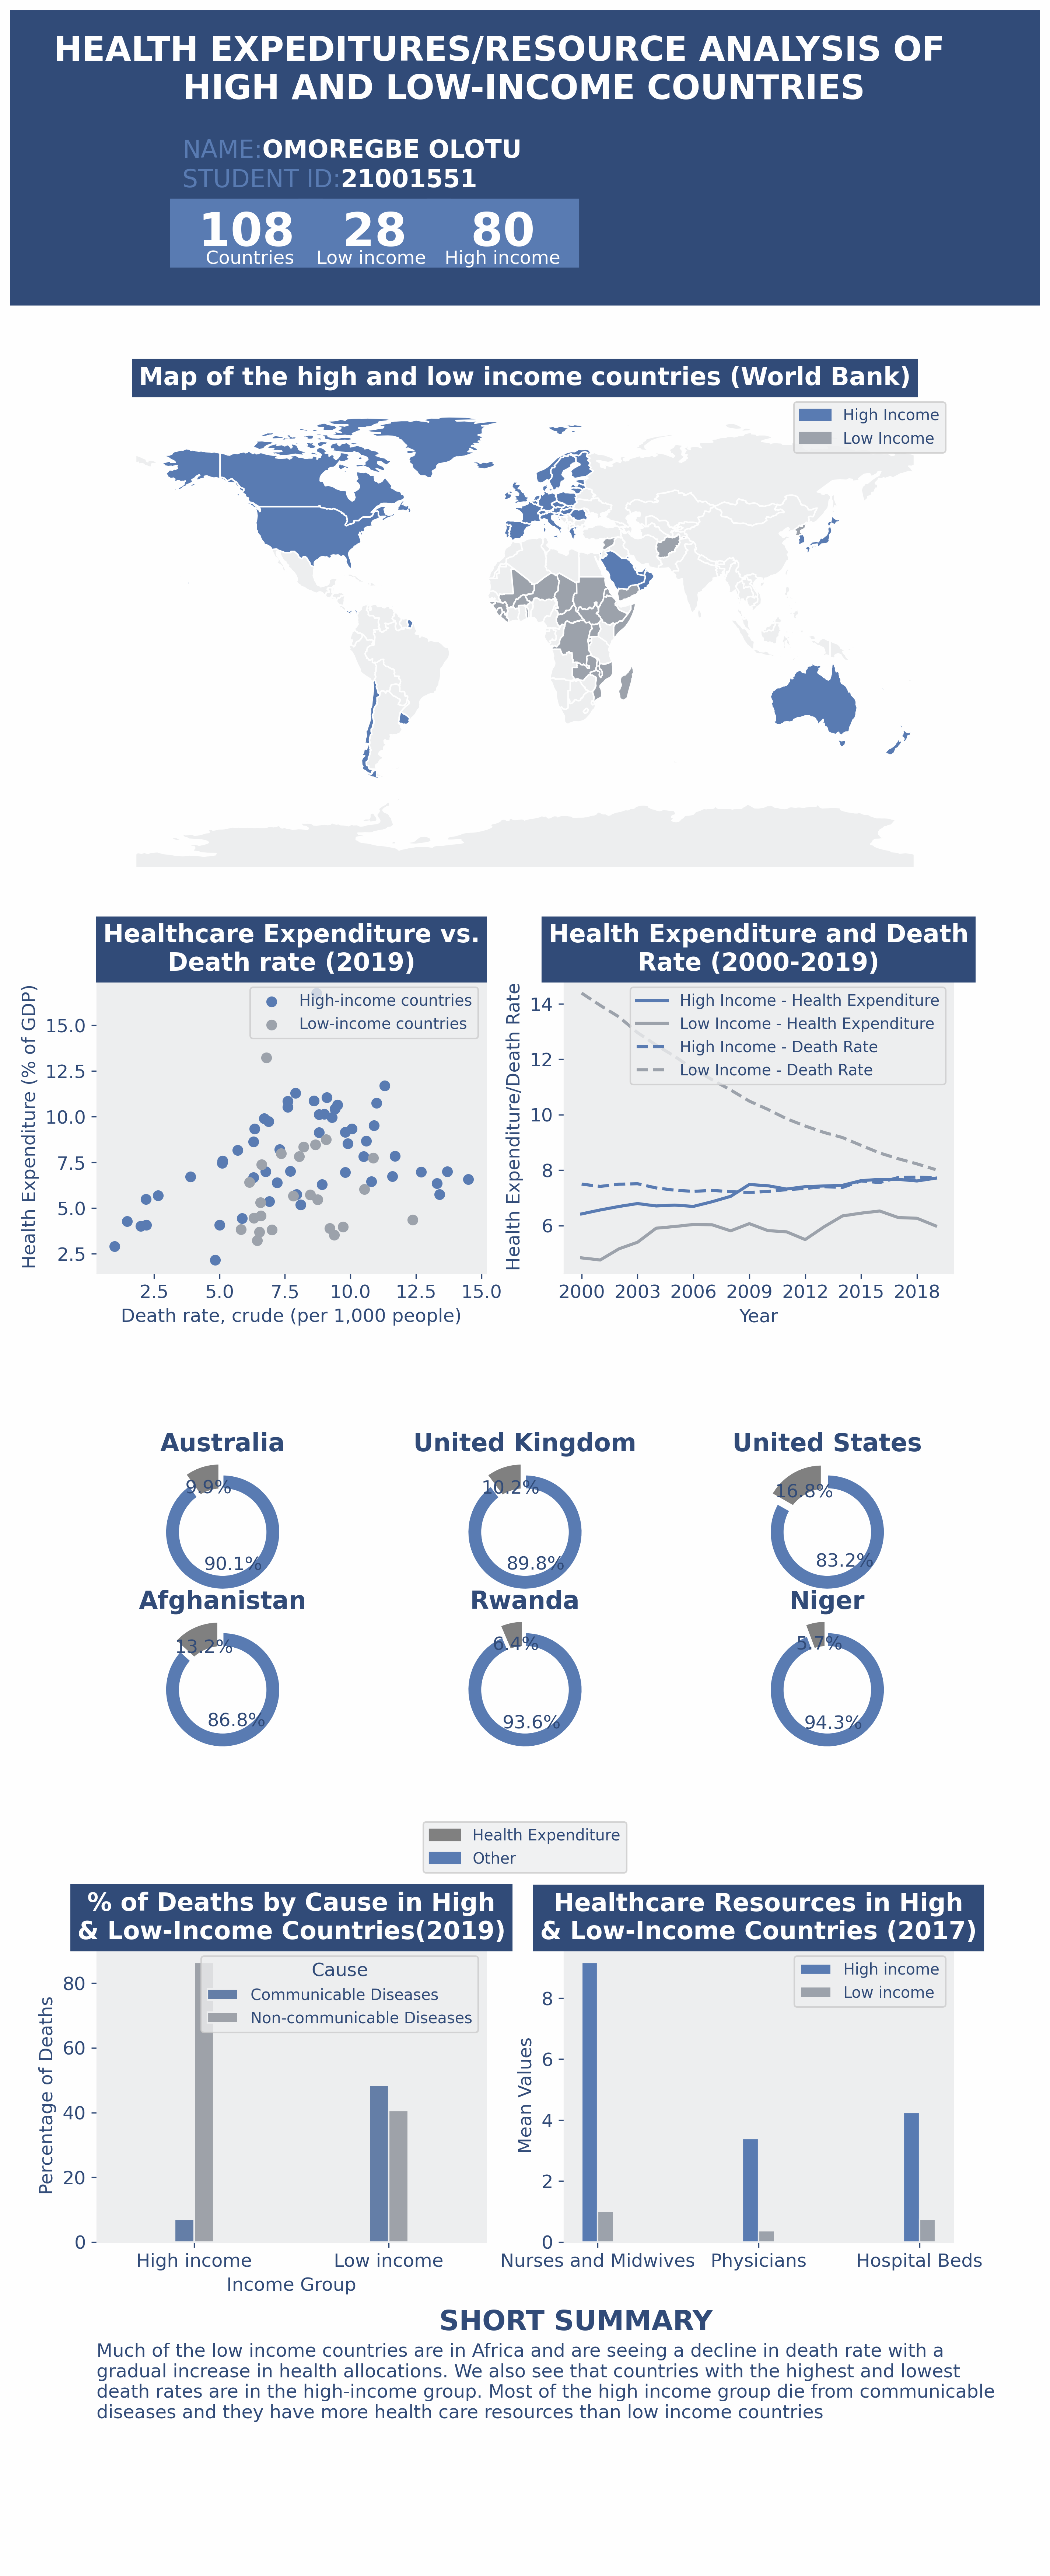

In [5]:
fig = plt.figure(figsize=(10, 30), dpi=300, layout="constrained")
gs = gridspec.GridSpec(nrows=8, ncols=1, hspace=0.1)

# My colour scheme
bg_colour = "#FEFEFE"
bg_accent = "#EDEEEF"
bg_accent2 = "#808080"
text_colour = "#314B78"
accent_colour1 = "#597BB2"
accent_colour2 = "#9CA2AB"


def create_title_with_background(ax, title, bgcolor=text_colour, text_color=bg_colour):
    title_obj = ax.set_title(title, color=text_color, backgroundcolor=bgcolor)
    #title_obj.set_bbox(dict(facecolor=bgcolor, edgecolor='none'))

def transform_to_data(ax, label_width_display, width=True):
  inv = ax.transData.inverted()
  if width: label_width_data = inv.transform((label_width_display, 0))[0] - inv.transform((0, 0))[0]
  else: label_width_data = inv.transform((0, label_width_display))[1] - inv.transform((0, 0))[1]
  return label_width_data
    
# Matplotlib global settings
fig.set_facecolor(bg_colour)
plt.rc('lines', linewidth=2, linestyle='--', color=accent_colour1)
plt.rc('text', color=text_colour)
plt.rc('font', size=12.0)
plt.rc('axes', edgecolor=bg_accent, grid=False, labelcolor=text_colour, titlesize=16, titleweight="bold", facecolor=bg_accent)
plt.rc('xtick', color=text_colour)
plt.rc('ytick', color=text_colour)
plt.rc('legend', labelcolor=text_colour, fontsize=10)



# Top section of the poster
top_section = plt.subplot(gs[0, 0])
bg_color = patches.Rectangle((-0.1, 0), 1.2, 1, transform=top_section.transAxes, clip_on=False, color=text_colour)
top_section.add_patch(bg_color)
top_section.axis('off')

# Add text to the top section
with plt.rc_context({'font.size': 16, 'text.color':bg_colour}):
  name = top_section.text(-0.05, 0.7, 'HEALTH EXPEDITURES/RESOURCE ANALYSIS OF\n           HIGH AND LOW-INCOME COUNTRIES', size=22, fontweight="bold")
  name = top_section.text(0.1, 0.5, 'NAME:', color=accent_colour1)
  top_section.text(name.get_position()[0]+transform_to_data(top_section, name.get_window_extent().width), name.get_position()[1], 'OMOREGBE OLOTU', fontweight="bold")
  name = top_section.text(0.1, 0.4, 'STUDENT ID:', color=accent_colour1)
  top_section.text(name.get_position()[0]+transform_to_data(top_section, name.get_window_extent().width), name.get_position()[1], '21001551', fontweight="bold")
  name = top_section.text(0.1, 0.2, f' {len(low_income+high_income)} ', backgroundcolor=accent_colour1, size=30, fontweight="bold")
  top_section.text(name.get_position()[0], name.get_position()[1]-transform_to_data(top_section, name.get_window_extent().height, False)/2.5, '    Countries', size=12)
  name = top_section.text(name.get_position()[0]+transform_to_data(top_section, name.get_window_extent().width), name.get_position()[1], f'  {len(low_income)}  ', backgroundcolor=accent_colour1, size=30, fontweight="bold")
  top_section.text(name.get_position()[0], name.get_position()[1]-transform_to_data(top_section, name.get_window_extent().height, False)/2.5, ' Low income', size=12)
  name = top_section.text(name.get_position()[0]+transform_to_data(top_section, name.get_window_extent().width), name.get_position()[1], f'  {len(high_income)}  ', backgroundcolor=accent_colour1, size=30, fontweight="bold")
  top_section.text(name.get_position()[0], name.get_position()[1]-transform_to_data(top_section, name.get_window_extent().height, False)/2.5, ' High income', size=12)



# Map section
ax1 = fig.add_subplot(gs[1:3, 0])
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
filtered_high_income_data = world[world['iso_a3'].isin(high_income)]
filtered_low_income_data = world[world['iso_a3'].isin(low_income)]
world.plot(ax=ax1, color=bg_accent, edgecolor=bg_colour)
filtered_high_income_data.plot(ax=ax1, color=accent_colour1, label='High Income', edgecolor=bg_colour)
filtered_low_income_data.plot(ax=ax1, color=accent_colour2, label='Low Income', edgecolor=bg_colour)
ax1.axis('off')
ax1.set_aspect(1.2)
create_title_with_background(ax1, 'Map of the high and low income countries (World Bank)')
legend_elements = [patches.Patch(facecolor=accent_colour1, edgecolor=accent_colour1, label='High Income'),
                   patches.Patch(facecolor=accent_colour2, edgecolor=accent_colour2, label='Low Income')]
ax1.legend(handles=legend_elements)


# Healthcare Expenditure and Disease Burden Section
health_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[3])
# Scatter Plot
ax20 = fig.add_subplot(health_grid[0])
health_expenditure_high_income = health_expenditure_df[health_expenditure_df['Country Code'].isin(high_income)]
health_expenditure_low_income = health_expenditure_df[health_expenditure_df['Country Code'].isin(low_income)]
death_rate_high_income = death_rate_df[death_rate_df['Country Code'].isin(high_income)]
death_rate_low_income = death_rate_df[death_rate_df['Country Code'].isin(low_income)]
high_income_merged = health_expenditure_high_income.merge(death_rate_high_income, on='Country Code')
low_income_merged = health_expenditure_low_income.merge(death_rate_low_income, on='Country Code')
high_income_data = high_income_merged[['Country Name_x', 'Country Code', '2019_x', '2019_y']]
low_income_data = low_income_merged[['Country Name_x', 'Country Code', '2019_x', '2019_y']]
high_income_data.columns = ['Country Name', 'Country Code', 'Health Expenditure (% of GDP)', 'Death rate, crude (per 1,000 people)']
low_income_data.columns = ['Country Name', 'Country Code', 'Health Expenditure (% of GDP)', 'Death rate, crude (per 1,000 people)']
ax20.scatter(high_income_data['Death rate, crude (per 1,000 people)'], high_income_data['Health Expenditure (% of GDP)'], label='High-income countries', color=accent_colour1)
ax20.scatter(low_income_data['Death rate, crude (per 1,000 people)'], low_income_data['Health Expenditure (% of GDP)'], label='Low-income countries', color=accent_colour2)
ax20.set_ylabel('Health Expenditure (% of GDP)')
ax20.set_xlabel('Death rate, crude (per 1,000 people)')
ax20.legend()
create_title_with_background(ax20, 'Healthcare Expenditure vs.\nDeath rate (2019)')
# Annotate the names of the countries on each point. The country names are too close so I comment them
"""
for i in range(len(high_income_data)):
    ax20.annotate(high_income_data.iloc[i]['Country Name'], (high_income_data.iloc[i]['Health Expenditure (% of GDP)'], high_income_data.iloc[i]['Death rate, crude (per 1,000 people)']))
for i in range(len(low_income_data)):
    ax20.annotate(low_income_data.iloc[i]['Country Name'], (low_income_data.iloc[i]['Health Expenditure (% of GDP)'], low_income_data.iloc[i]['Death rate, crude (per 1,000 people)']))
"""

# Line graph
ax21 = fig.add_subplot(health_grid[1])
health_expenditure_high = health_expenditure_df.loc[health_expenditure_df['Country Code'].isin(high_income)]
health_expenditure_low = health_expenditure_df.loc[health_expenditure_df['Country Code'].isin(low_income)]
death_rate_high = death_rate_df.loc[death_rate_df['Country Code'].isin(high_income)]
death_rate_low = death_rate_df.loc[death_rate_df['Country Code'].isin(low_income)]
# Calculate the mean health expenditure and death rate for each year
health_expenditure_high_mean = health_expenditure_high.iloc[:, 2:].mean()
health_expenditure_low_mean = health_expenditure_low.iloc[:, 2:].mean()
death_rate_high_mean = death_rate_high.iloc[:, 2:].mean()
death_rate_low_mean = death_rate_low.iloc[:, 2:].mean()
# Plot the line chart 2000-2019
years = list(str(i) for i in range(2000, 2020))
ax21.plot(years, health_expenditure_high_mean.loc[years], linestyle='-', color=accent_colour1, label='High Income - Health Expenditure')
ax21.plot(years, health_expenditure_low_mean.loc[years], linestyle='-', color=accent_colour2, label='Low Income - Health Expenditure')
ax21.plot(years, death_rate_high_mean.loc[years], linestyle='--', color=accent_colour1, label='High Income - Death Rate')
ax21.plot(years, death_rate_low_mean.loc[years], linestyle='--', color=accent_colour2, label='Low Income - Death Rate')
ax21.set_xlabel('Year')
ax21.set_ylabel('Health Expenditure/Death Rate')
create_title_with_background(ax21, 'Health Expenditure and Death\nRate (2000-2019)')
# Declutter the x-axis
xlocs = ax21.get_xticks()
xlabs = ax21.get_xticklabels()
ax21.set_xticks(xlocs[::3])
ax21.set_xticklabels(xlabs[::3])
ax21.legend()



# Pie grid
pie_grid = gridspec.GridSpecFromSubplotSpec(4, int(len(selected_countries)/2), subplot_spec=gs[4:6], hspace=0.1)
selected_countries_df = pd.DataFrame({'Country Code': selected_countries})
health_expenditure_df_selected = pd.merge(selected_countries_df, health_expenditure_df, on='Country Code', how='inner')
for i, (country, data) in enumerate(health_expenditure_df_selected.iterrows()):
    health_expenditure_percentage = data['2019']
    other_expenditure_percentage = 100 - health_expenditure_percentage
    sizes = [health_expenditure_percentage, other_expenditure_percentage]
    if i >= 3: colors = [bg_accent2, accent_colour1]
    else: colors = [bg_accent2, accent_colour1]
    ax = fig.add_subplot(pie_grid[1+i//3, i%3])
    ax.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': bg_colour}, explode=(0.2, 0))
    ax.pie([1], colors=[bg_colour], radius=0.75, wedgeprops={'linewidth': 1, 'edgecolor': bg_colour})
    ax.set_title(data['Country Name'], fontsize=16)

legend_elements = [patches.Patch(facecolor=bg_accent2, edgecolor=bg_accent2, label='Health Expenditure'),
                   patches.Patch(facecolor=accent_colour1, edgecolor=accent_colour1, label='Other')]
legend_ax = fig.add_subplot(pie_grid[3, :])
legend_ax.axis('off')
legend_ax.legend(handles=legend_elements, loc="center")



# Box grid
box_grid = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs[6])
# Section 3: Communicable vs. Non-Communicable Diseases
ax3 = fig.add_subplot(box_grid[0])
merged_df = pd.merge(cause_of_death_communicable_df, cause_of_death_noncommunicable_df, on='Country Code', suffixes=('_comm', '_noncomm'))
filtered_df = merged_df[merged_df['Country Code'].isin(high_income + low_income)]
melted_df = filtered_df.melt(id_vars=['Country Name_comm', 'Country Code'], value_vars=['2019_comm', '2019_noncomm'], var_name='Cause', value_name='Percentage')
cause_mapping = {'2019_comm': 'Communicable Diseases', '2019_noncomm': 'Non-communicable Diseases'}
melted_df['Cause'] = melted_df['Cause'].map(cause_mapping)
melted_df['Income Group'] = melted_df['Country Code'].apply(lambda x: 'High income' if x in high_income else 'Low income')
# Create a bar chart using seaborn
width = 0.1
sns.barplot(x='Income Group', y='Percentage', hue='Cause', data=melted_df, palette=[accent_colour1, accent_colour2], errorbar=None, ax=ax3, edgecolor=bg_accent, width=width*2)
create_title_with_background(ax3, '% of Deaths by Cause in High\n& Low-Income Countries(2019)')
ax3.set_xlabel('Income Group')
ax3.set_ylabel('Percentage of Deaths')

# Section 4: Healthcare Resources
ax4 = fig.add_subplot(box_grid[1])
# Merge the datasets on 'Country Code'
merged_df = nurses_midwives_df.merge(physicians_df, on='Country Code', suffixes=('_nurses_midwives', '_physicians'))
merged_df = merged_df.merge(specialist_surgical_workforce_df, on='Country Code')
merged_df = merged_df.merge(hospital_beds_df, on='Country Code', suffixes=('_specialist_surgical_workforce', '_hospital_beds'))
# Select relevant columns and rename them
healthcare_resources_df = merged_df[['Country Name_nurses_midwives', 'Country Code', '2017_nurses_midwives', '2017_physicians', '2017_hospital_beds']]
healthcare_resources_df.columns = ['Country Name', 'Country Code', 'Nurses and Midwives', 'Physicians', 'Hospital Beds']
# Add a new column to indicate the income group of each country
income_group_df = Country_metadata_df[['Country Code', 'IncomeGroup']]
healthcare_resources_df = healthcare_resources_df.merge(income_group_df, on='Country Code')
# Separate high-income and low-income countries data
high_income_df = healthcare_resources_df[healthcare_resources_df['Country Code'].isin(high_income)]
low_income_df = healthcare_resources_df[healthcare_resources_df['Country Code'].isin(low_income)]
# Calculate mean values for each healthcare resource in both income groups
high_income_means = high_income_df.mean()
low_income_means = low_income_df.mean()
# Set up the bar chart
ind = np.arange(len(high_income_means))
ax4.bar(ind - width/2, high_income_means, width, label='High income', color=accent_colour1, edgecolor=bg_accent)
ax4.bar(ind + width/2, low_income_means, width, label='Low income', color=accent_colour2, edgecolor=bg_accent)
# Add labels, title, and custom x-axis tick labels, etc.
ax4.set_ylabel('Mean Values')
create_title_with_background(ax4, 'Healthcare Resources in High\n& Low-Income Countries (2017)')
ax4.set_xticks(ind)
ax4.set_xticklabels(('Nurses and Midwives', 'Physicians', 'Hospital Beds'))
ax4.legend()


# bottom section of the poster
bot_section = plt.subplot(gs[7])
bot_section.axis('off')
# Add text to the bottom section
with plt.rc_context({'font.size': 12}):
  name = bot_section.text(0.4, 0.8, 'SHORT SUMMARY', size=18, fontweight="bold")
  name = bot_section.text(0, 0.5, 'Much of the low income countries are in Africa and are seeing a decline in death rate with a\n\
gradual increase in health allocations. We also see that countries with the highest and lowest\n\
death rates are in the high-income group. Most of the high income group die from communicable\n\
diseases and they have more health care resources than low income countries')


plt.tight_layout()
fig.subplots_adjust(hspace=0)
#plt.show()
plt.savefig('21001551.png', dpi=300)